In [11]:

# for data load
import os

# for reading and processing images
import imageio
from PIL import Image

# for visualizations
import matplotlib.pyplot as plt

import numpy as np # for using np arrays

# for bulding and running deep learning model
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split

In [12]:
def LoadData (path1):
    image_dataset = os.listdir(path1)
    orig_img = []
    for file in image_dataset:
        orig_img.append(file)
    return orig_img

<ipython-input-13-b7f6ed5f08ca>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_view  = imageio.imread(path1 + img[i])


(335, 500, 3)


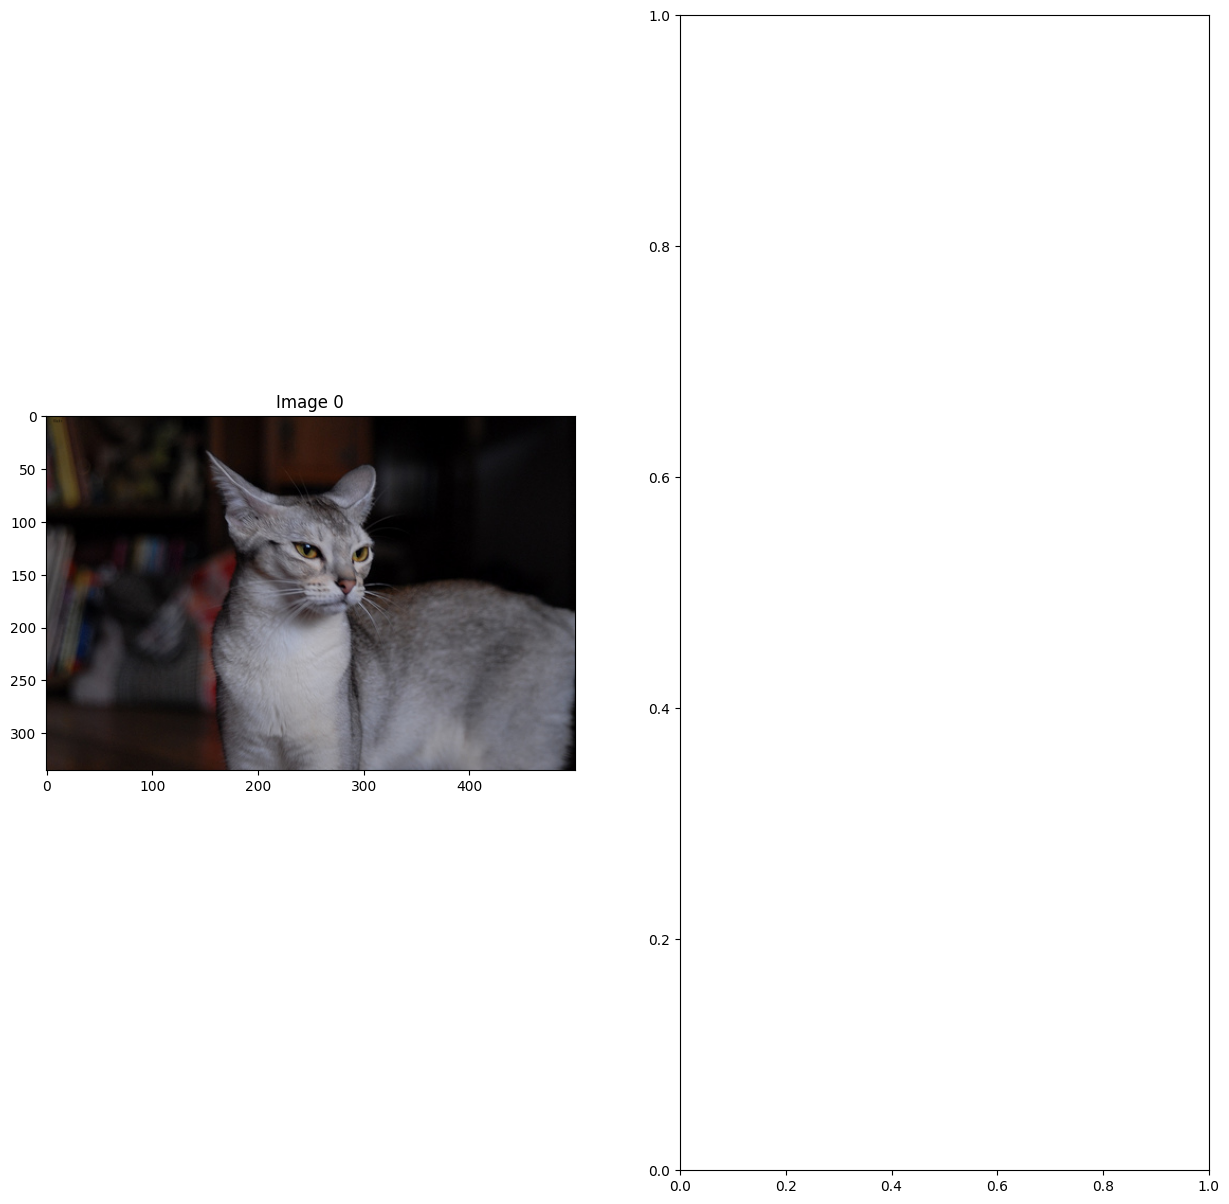

In [13]:

path1 = '/content/data/'

img = LoadData (path1)
show_images = 1
for i in range(show_images):
    img_view  = imageio.imread(path1 + img[i])

    print(img_view.shape)

    fig, arr = plt.subplots(1, 2, figsize=(15, 15))
    arr[0].imshow(img_view)
    arr[0].set_title('Image '+ str(i))


In [18]:
#add guasian noise
import os
import numpy as np
from PIL import Image

def addguassian(img, target_shape_img, path1, mean=0, std=25):
    """
    Processes the images present in the shared list and path
    Returns a NumPy dataset with images as 3-D arrays of desired size and adds Gaussian noise
    """
    # Pull the relevant dimensions for the image
    m = len(img)                    # number of images
    i_h, i_w, i_c = target_shape_img   # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Function to add Gaussian noise to the image
    def add_gaussian_noise(image, mean, std):
        row, col, ch = image.shape
        gaussian = np.random.normal(mean, std, (row, col, ch))
        noisy_image = image + gaussian
        noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to stay within valid range
        return noisy_image

    # Process images
    for file in img:
        # Convert image into an array of desired shape (3 channels)
        index = img.index(file)
        path = os.path.join(path1, file)
        single_img = Image.open(path).convert('RGB')
        single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions first
        single_img = np.array(single_img, dtype=np.float32)
        single_img = add_gaussian_noise(single_img, mean, std)  # Add Gaussian noise
        single_img = single_img / 256.0
        X[index] = single_img

    return X

In [19]:
#remove guassian noise
import os
import numpy as np
from PIL import Image, ImageFilter

def removeguassian(img, target_shape_img, path1, filter_size=3):

    # Pull the relevant dimensions for the image
    m = len(img)                    # number of images
    i_h, i_w, i_c = target_shape_img   # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Function to denoise the image
    def denoise_image(image, size):
        return image.filter(ImageFilter.MedianFilter(size))

    # Process images
    for file in img:
        # Convert image into an array of desired shape (3 channels)
        index = img.index(file)
        path = os.path.join(path1, file)
        single_img = Image.open(path).convert('RGB')
        single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions first
        single_img = denoise_image(single_img, filter_size)  # Apply denoising filter
        single_img = np.array(single_img, dtype=np.float32) / 256.0
        X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

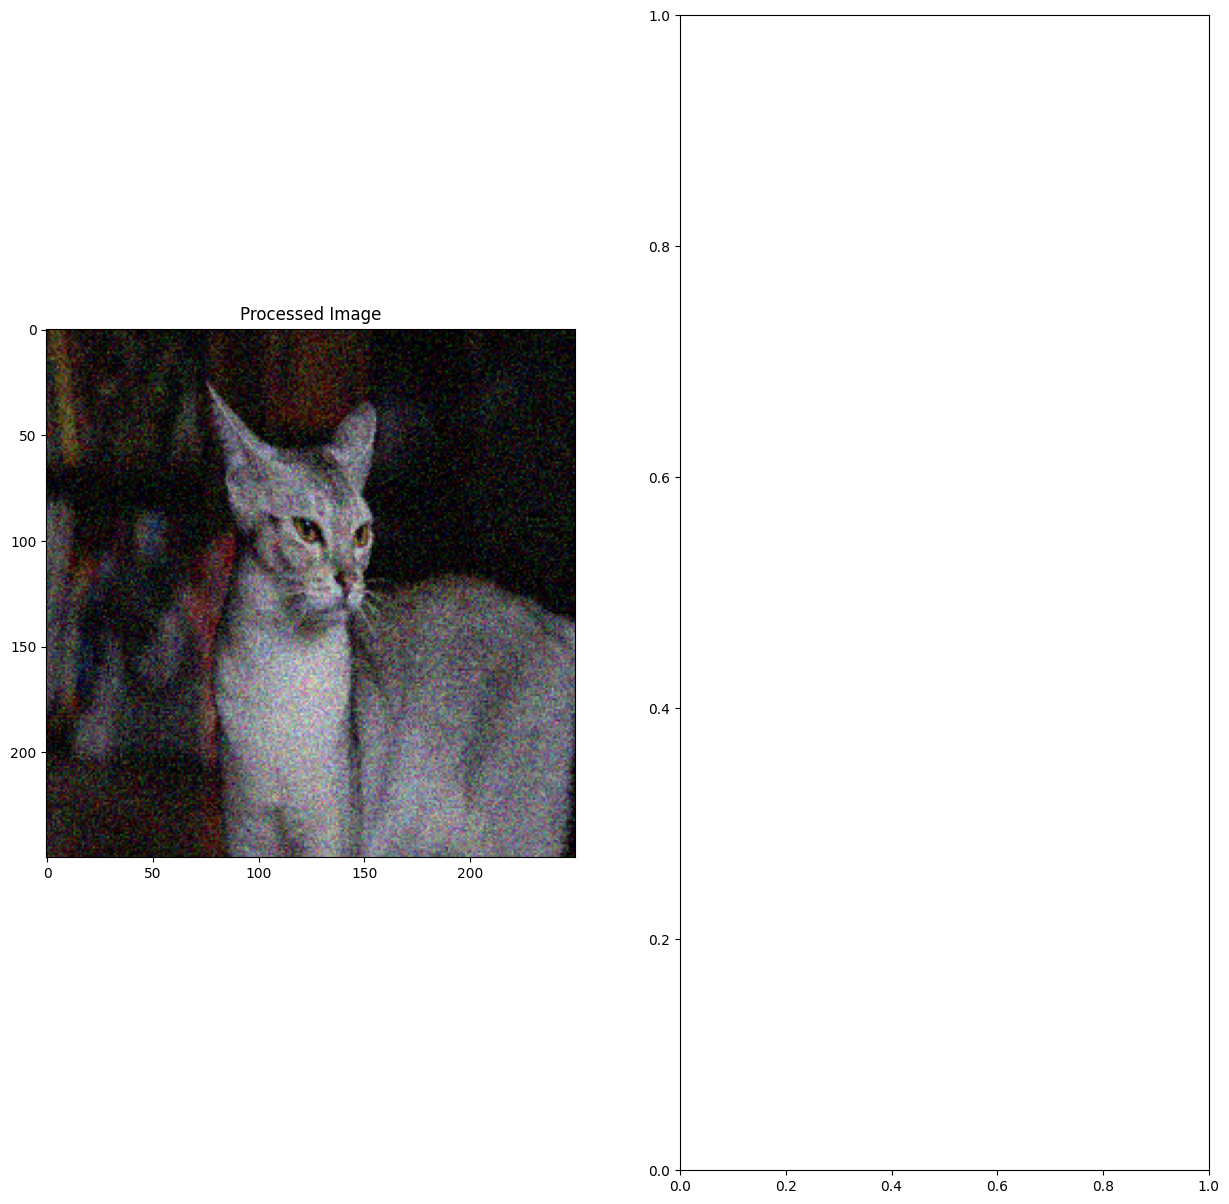

In [20]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= addguassian(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

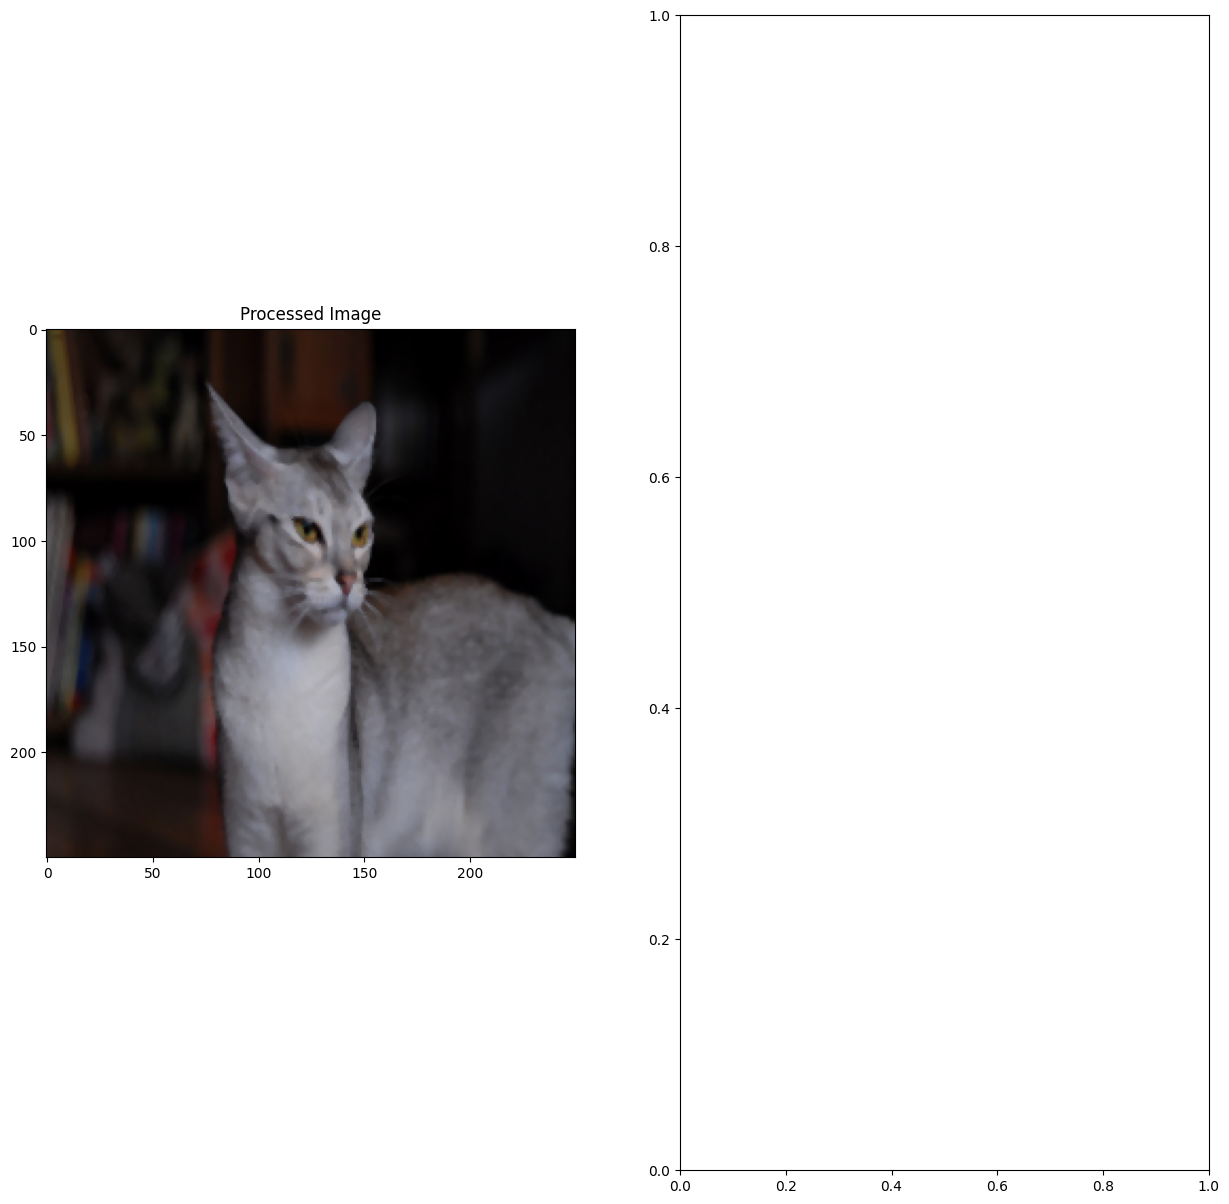

In [21]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= removeguassian(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

In [30]:
import os
import numpy as np
from PIL import Image

def add_mean_noise(image, mean):
    """
    Adds mean noise to the image.
    """
    noisy_image = image + mean
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to stay within valid range
    return noisy_image

def addmean(img, target_shape_img, path1, mean=10):
    """
    Processes the images present in the shared list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and adds mean noise.

    Parameters:
    img (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    mean (float): Mean noise value to be added. Default is 10.

    Returns:
    numpy.ndarray: Array of processed images with added mean noise.
    """
    # Pull the relevant dimensions for the image
    m = len(img)                    # number of images
    i_h, i_w, i_c = target_shape_img   # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Process images
    for file in img:
        # Convert image into an array of desired shape (3 channels)
        index = img.index(file)
        path = os.path.join(path1, file)
        single_img = Image.open(path).convert('RGB')
        single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions first
        single_img = np.array(single_img, dtype=np.float32)
        single_img = add_mean_noise(single_img, mean)  # Add mean noise
        single_img = single_img / 256.0
        X[index] = single_img

    return X


In [31]:
import os
import numpy as np
from PIL import Image, ImageFilter

def removemean(img, target_shape_img, path1, filter_size=3):
    """
    Processes the images present in the given list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and removes mean noise.

    Parameters:
    img (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    filter_size (int): Size of the median filter to be applied. Default is 3.

    Returns:
    numpy.ndarray: Array of processed images with mean noise removed.
    """
    # Pull the relevant dimensions for the image
    m = len(img)                    # number of images
    i_h, i_w, i_c = target_shape_img   # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Function to denoise the image using median filter
    def denoise_image(image, size):
        return image.filter(ImageFilter.MedianFilter(size))

    # Function to remove mean noise by subtracting the mean pixel value
    def subtract_mean_noise(image):
        mean_value = np.mean(image, axis=(0, 1))
        denoised_image = image - mean_value
        denoised_image = np.clip(denoised_image, 0, 255)  # Clip values to stay within valid range
        return denoised_image

    # Process images
    for file in img:
        # Convert image into an array of desired shape (3 channels)
        index = img.index(file)
        path = os.path.join(path1, file)
        single_img = Image.open(path).convert('RGB')
        single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions first
        single_img = np.array(single_img, dtype=np.float32)
        single_img = subtract_mean_noise(single_img)  # Subtract mean noise
        single_img = denoise_image(Image.fromarray(single_img.astype(np.uint8)), filter_size)  # Apply denoising filter
        single_img = np.array(single_img, dtype=np.float32) / 256.0
        X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

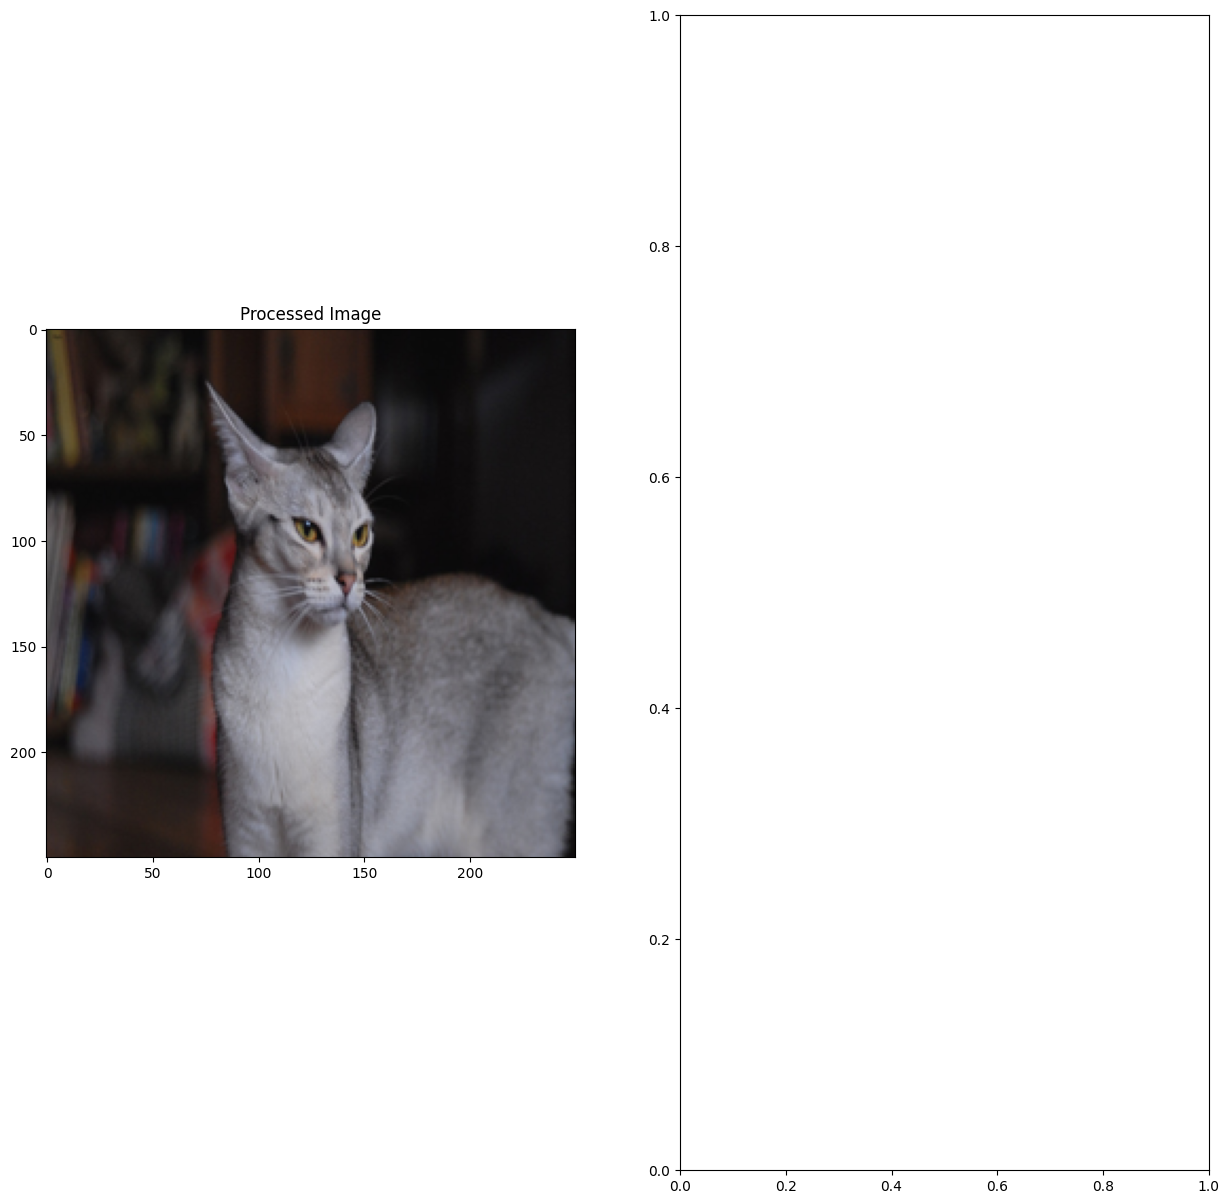

In [32]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= addmean(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

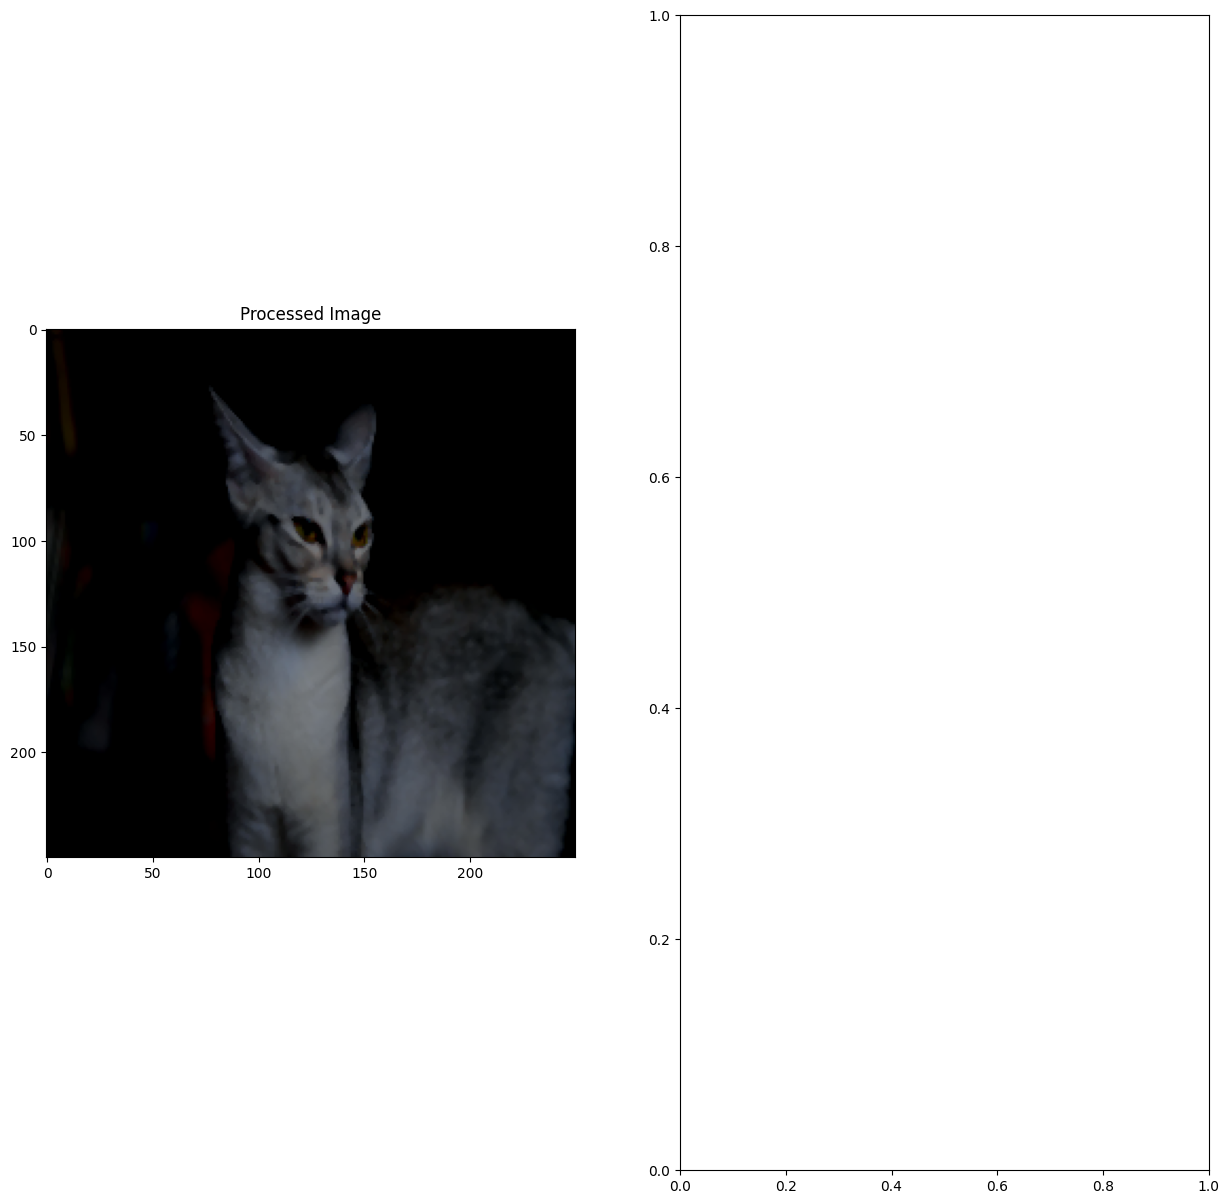

In [33]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= removemean(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

In [36]:
import os
import numpy as np
from PIL import Image, ImageFilter

def add_median_noise(image, noise_percentage=0.1):
    """
    Adds median noise to the image by replacing a percentage of pixels with the median of their local neighborhood.

    Parameters:
    image (numpy.ndarray): The input image.
    noise_percentage (float): The percentage of pixels to alter with median noise. Default is 0.1 (10%).

    Returns:
    numpy.ndarray: Image with added median noise.
    """
    noisy_image = image.copy()
    num_noisy_pixels = int(noise_percentage * image.size / image.shape[2])  # Divide by channels to get pixel count

    # Get indices for the noisy pixels
    row_indices = np.random.randint(0, image.shape[0], num_noisy_pixels)
    col_indices = np.random.randint(0, image.shape[1], num_noisy_pixels)
    channel_indices = np.random.randint(0, image.shape[2], num_noisy_pixels)

    for row, col, ch in zip(row_indices, col_indices, channel_indices):
        # Define the local area to calculate the median
        row_start = max(0, row - 1)
        row_end = min(row + 2, image.shape[0])
        col_start = max(0, col - 1)
        col_end = min(col + 2, image.shape[1])
        local_area = image[row_start:row_end, col_start:col_end, ch]
        median_value = np.median(local_area)
        noisy_image[row, col, ch] = median_value

    return noisy_image

def preprocess_with_median_noise(img_files, target_shape_img, path1, noise_percentage=0.1):
    """
    Processes the images present in the given list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and adds median noise.

    Parameters:
    img_files (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    noise_percentage (float): The percentage of pixels to alter with median noise. Default is 0.1 (10%).

    Returns:
    numpy.ndarray: Array of processed images with added median noise.
    """
    # Pull the relevant dimensions for the image
    m = len(img_files)                    # number of images
    i_h, i_w, i_c = target_shape_img      # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Process images
    for index, file in enumerate(img_files):
        # Construct the full path to the image file
        path = os.path.join(path1, file)

        # Check if the file exists
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

        # Convert image into an array of desired shape (3 channels)
        with Image.open(path) as single_img:
            single_img = single_img.convert('RGB')
            single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions
            single_img = np.array(single_img, dtype=np.float32)
            single_img = add_median_noise(single_img, noise_percentage)  # Add median noise
            single_img = single_img / 256.0  # Normalize to [0, 1]
            X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

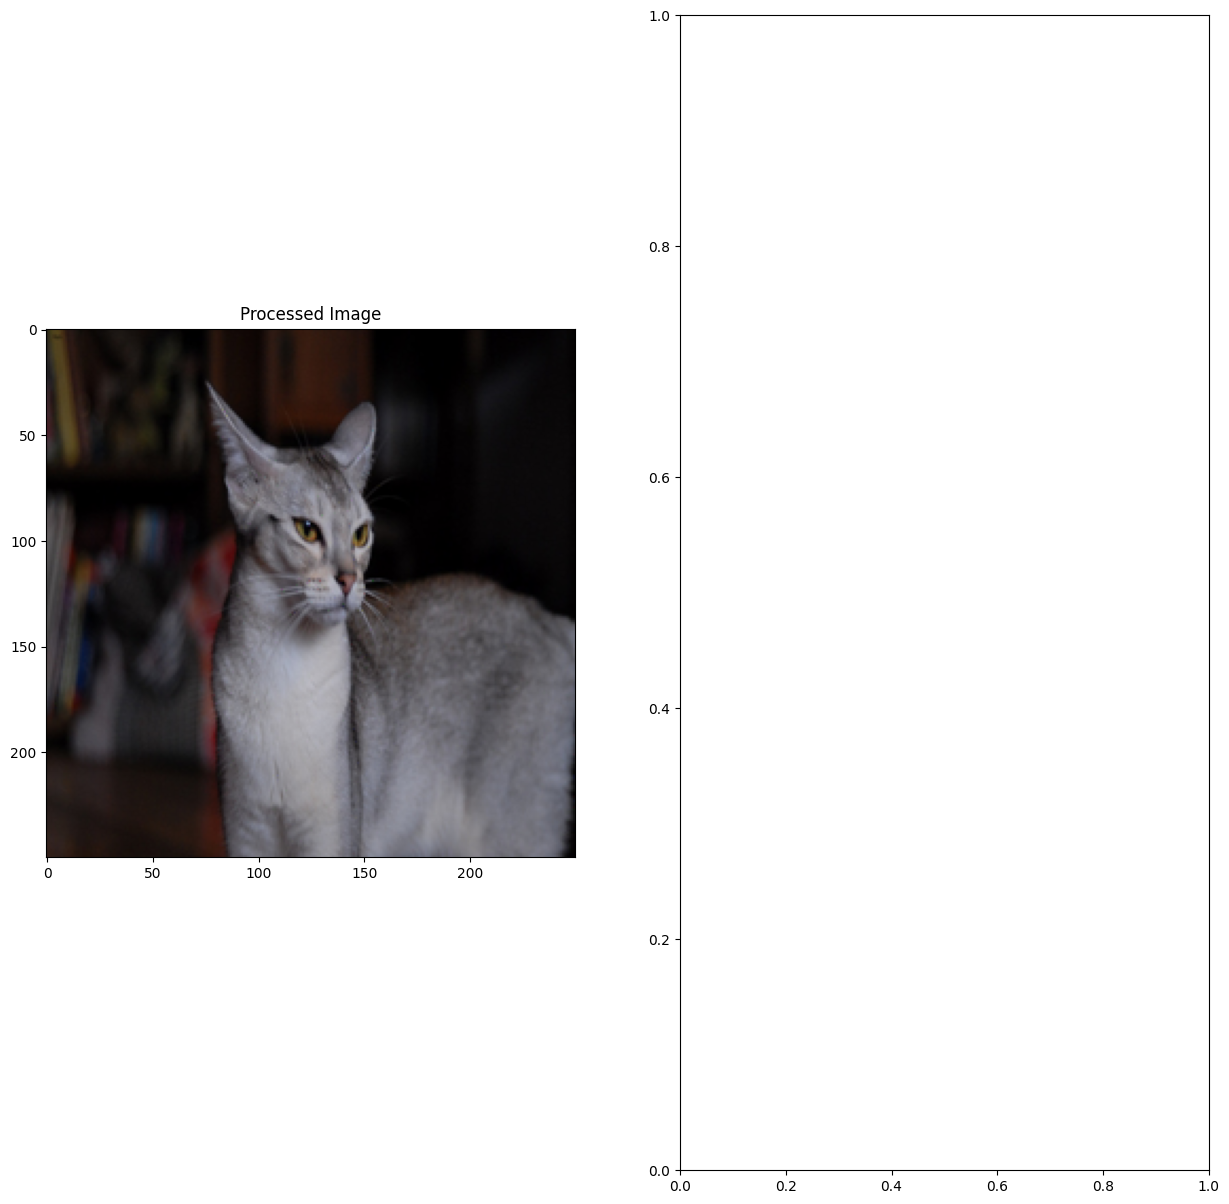

In [37]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= preprocess_with_median_noise(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

In [38]:
import os
import numpy as np
from PIL import Image, ImageFilter

def remove_median_noise(image, filter_size=3):
    """
    Applies a median filter to the image to remove median noise.

    Parameters:
    image (PIL.Image): The input image.
    filter_size (int): The size of the median filter. Default is 3.

    Returns:
    PIL.Image: Denoised image.
    """
    return image.filter(ImageFilter.MedianFilter(filter_size))

def preprocess_remove_median_noise(img_files, target_shape_img, path1, filter_size=3):
    """
    Processes the images present in the given list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and applies a median filter to remove noise.

    Parameters:
    img_files (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    filter_size (int): The size of the median filter. Default is 3.

    Returns:
    numpy.ndarray: Array of processed images with median noise removed.
    """
    # Pull the relevant dimensions for the image
    m = len(img_files)                    # number of images
    i_h, i_w, i_c = target_shape_img      # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Process images
    for index, file in enumerate(img_files):
        # Construct the full path to the image file
        path = os.path.join(path1, file)

        # Check if the file exists
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

        # Convert image into an array of desired shape (3 channels)
        with Image.open(path) as single_img:
            single_img = single_img.convert('RGB')
            single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions
            single_img = remove_median_noise(single_img, filter_size)  # Apply median filter to remove noise
            single_img = np.array(single_img, dtype=np.float32) / 256.0  # Normalize to [0, 1]
            X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

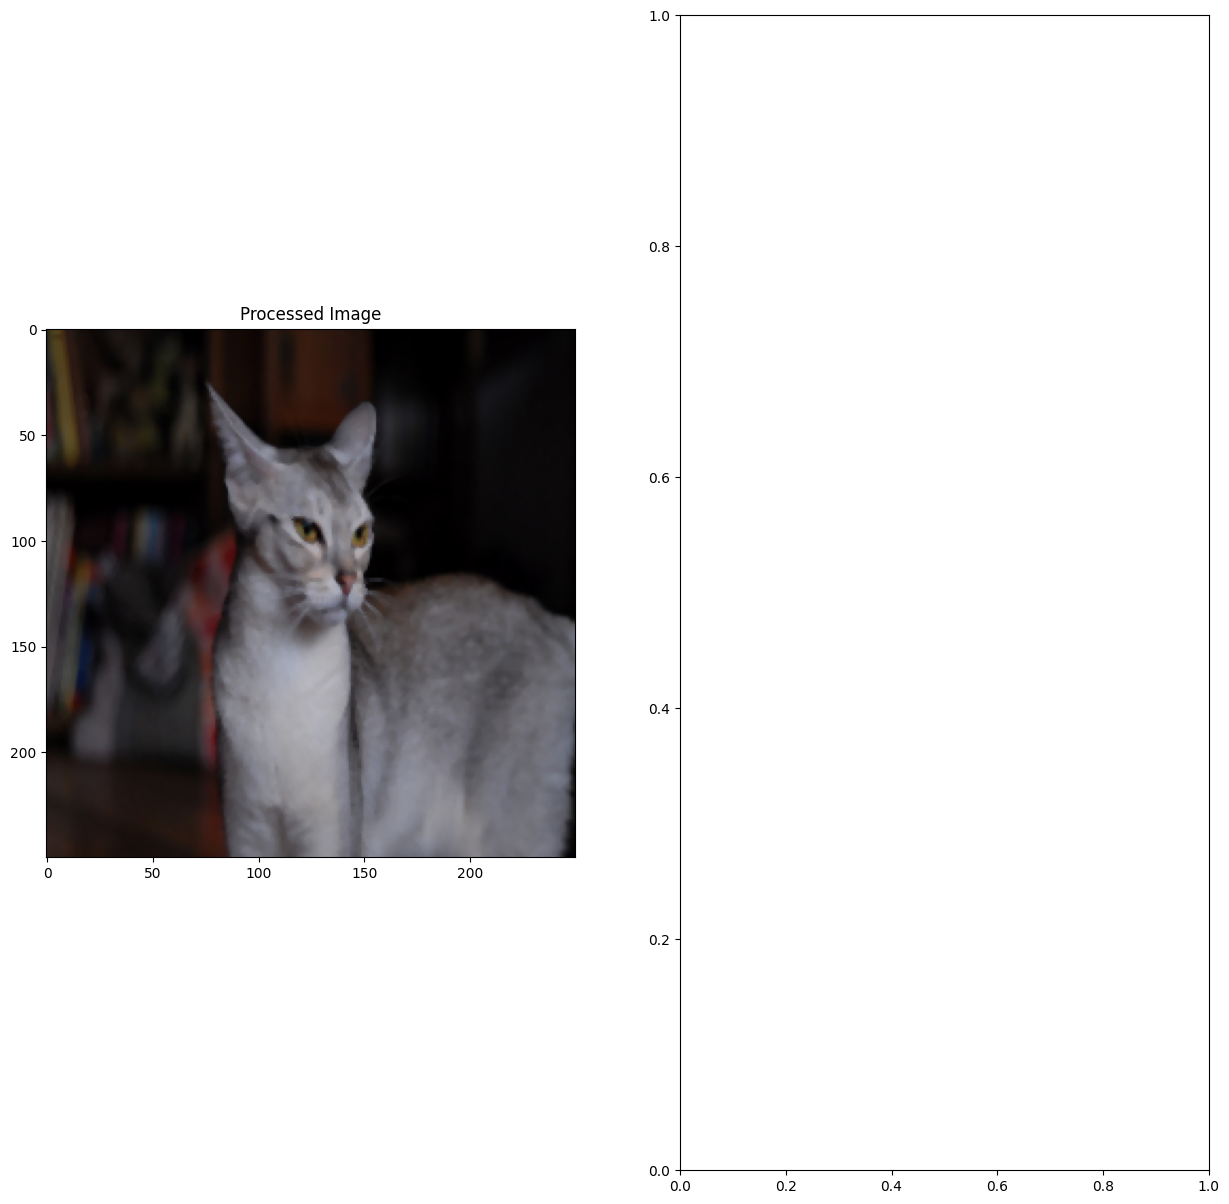

In [39]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= preprocess_remove_median_noise(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

In [40]:
import os
import numpy as np
from PIL import Image
from skimage import filters, util

def add_bilateral_noise(image, noise_amount=0.1):
    """
    Adds edge-preserving noise (somewhat like bilateral noise) to the image.

    Parameters:
    image (numpy.ndarray): The input image.
    noise_amount (float): The amount of noise to add. Default is 0.1 (10% of pixels).

    Returns:
    numpy.ndarray: Image with added bilateral-like noise.
    """
    # Convert the image to grayscale to detect edges
    grayscale_image = np.mean(image, axis=2)
    edges = filters.sobel(grayscale_image)

    # Create a mask for the edges
    edge_mask = edges > np.percentile(edges, 100 * (1 - noise_amount))

    # Add random noise to the edge areas
    noise = np.random.randn(*image.shape) * 255
    noisy_image = image.copy()
    noisy_image[edge_mask] += noise[edge_mask]
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to stay within valid range

    return noisy_image

def preprocess_with_bilateral_noise(img_files, target_shape_img, path1, noise_amount=0.1):
    """
    Processes the images present in the given list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and adds bilateral-like noise.

    Parameters:
    img_files (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    noise_amount (float): The amount of noise to add. Default is 0.1 (10% of pixels).

    Returns:
    numpy.ndarray: Array of processed images with added bilateral-like noise.
    """
    # Pull the relevant dimensions for the image
    m = len(img_files)                    # number of images
    i_h, i_w, i_c = target_shape_img      # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Process images
    for index, file in enumerate(img_files):
        # Construct the full path to the image file
        path = os.path.join(path1, file)

        # Check if the file exists
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

        # Convert image into an array of desired shape (3 channels)
        with Image.open(path) as single_img:
            single_img = single_img.convert('RGB')
            single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions
            single_img = np.array(single_img, dtype=np.float32)
            single_img = add_bilateral_noise(single_img, noise_amount)  # Add bilateral-like noise
            single_img = single_img / 256.0  # Normalize to [0, 1]
            X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


TypeError: 'Text' object is not callable

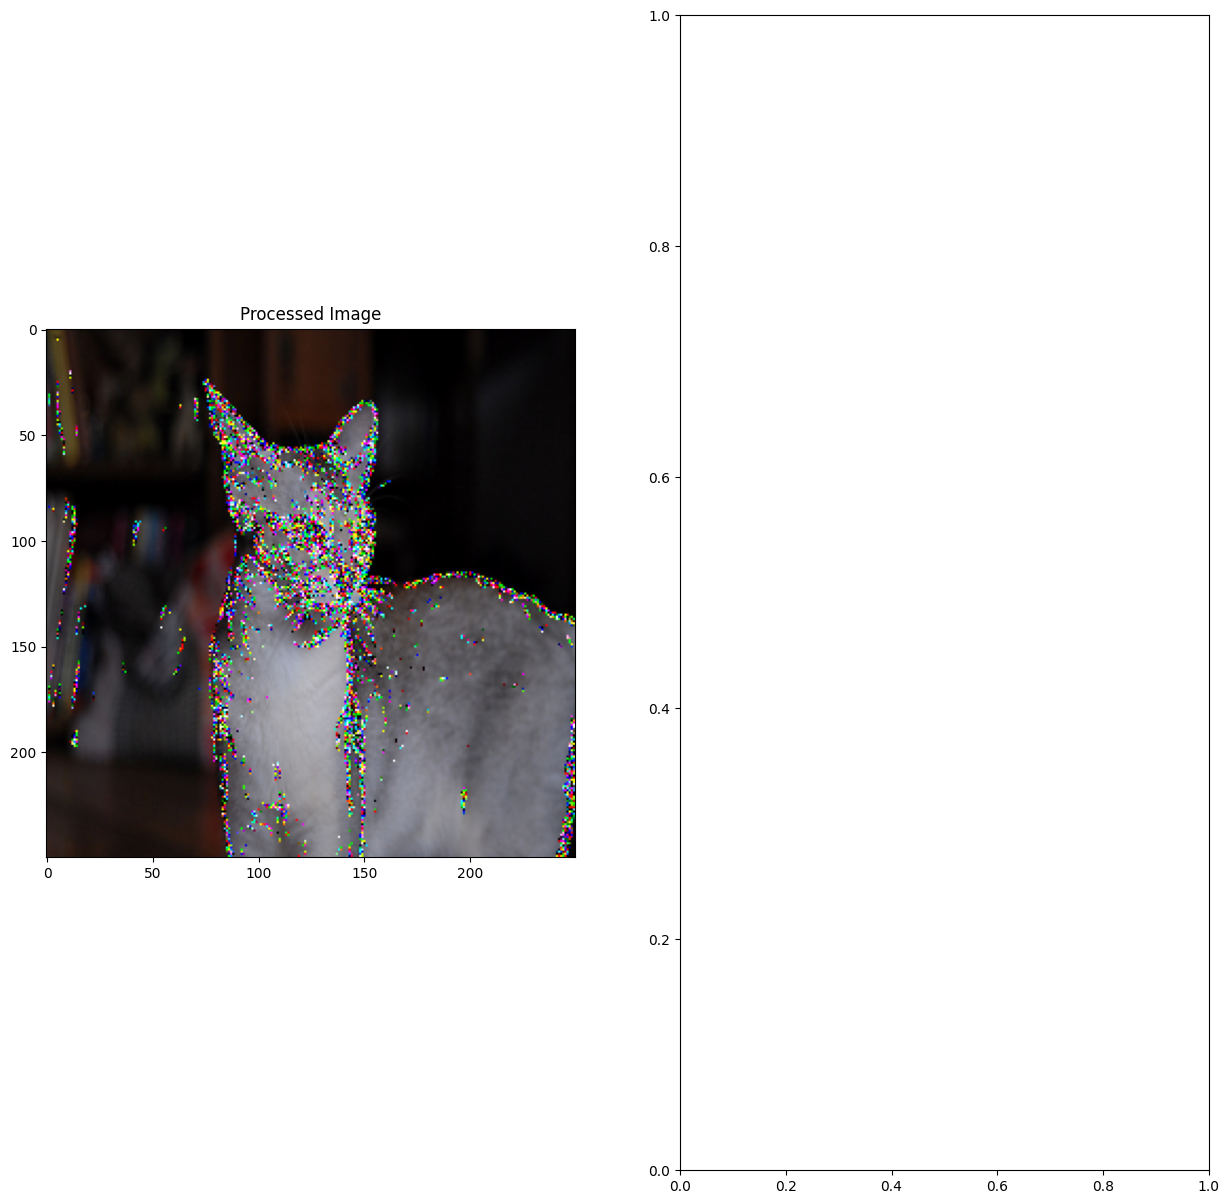

In [42]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= [250, 250, 3]
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X=  preprocess_with_bilateral_noise(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

In [43]:
import os
import numpy as np
from PIL import Image
import cv2

def remove_bilateral_noise(image, d=9, sigma_color=75, sigma_space=75):
    """
    Applies a bilateral filter to the image to remove noise while preserving edges.

    Parameters:
    image (numpy.ndarray): The input image.
    d (int): Diameter of each pixel neighborhood that is used during filtering.
    sigma_color (float): Filter sigma in the color space.
    sigma_space (float): Filter sigma in the coordinate space.

    Returns:
    numpy.ndarray: Denoised image.
    """
    return cv2.bilateralFilter(image, d, sigma_color, sigma_space)

def preprocess_remove_bilateral_noise(img_files, target_shape_img, path1, d=9, sigma_color=75, sigma_space=75):
    """
    Processes the images present in the given list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and applies a bilateral filter to remove noise.

    Parameters:
    img_files (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    d (int): Diameter of each pixel neighborhood that is used during filtering.
    sigma_color (float): Filter sigma in the color space.
    sigma_space (float): Filter sigma in the coordinate space.

    Returns:
    numpy.ndarray: Array of processed images with bilateral noise removed.
    """
    # Pull the relevant dimensions for the image
    m = len(img_files)                    # number of images
    i_h, i_w, i_c = target_shape_img      # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)

    # Process images
    for index, file in enumerate(img_files):
        # Construct the full path to the image file
        path = os.path.join(path1, file)

        # Check if the file exists
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

        # Convert image into an array of desired shape (3 channels)
        with Image.open(path) as single_img:
            single_img = single_img.convert('RGB')
            single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions
            single_img = np.array(single_img, dtype=np.float32)
            single_img = cv2.cvtColor(single_img, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV
            single_img = remove_bilateral_noise(single_img, d, sigma_color, sigma_space)  # Apply bilateral filter
            single_img = cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB)  # Convert back to RGB
            single_img = single_img / 256.0  # Normalize to [0, 1]
            X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

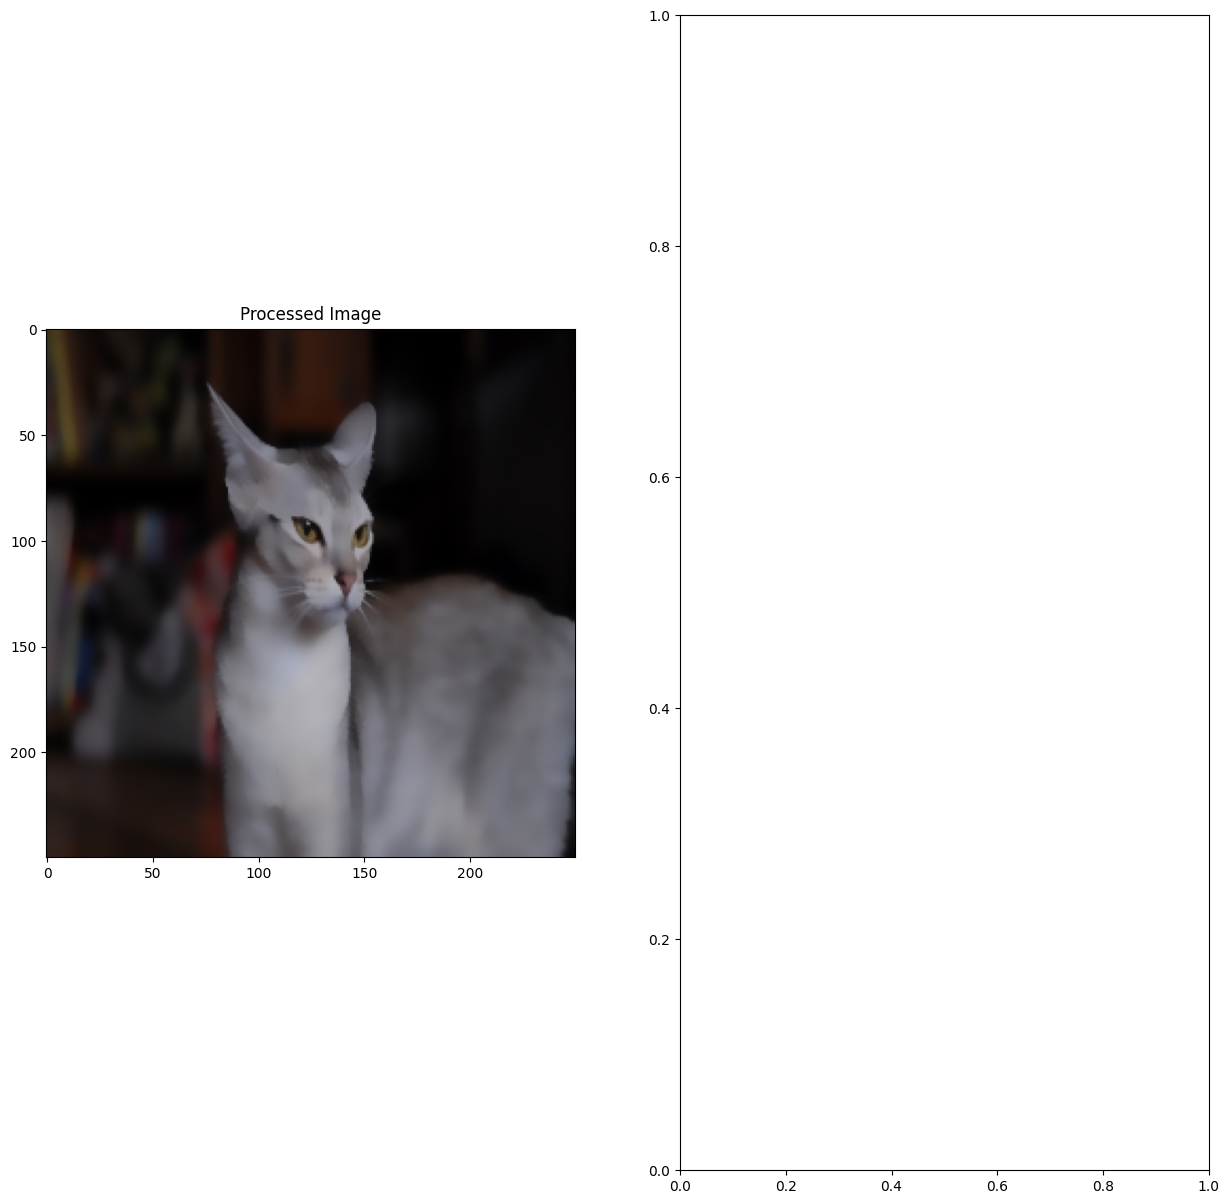

In [44]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= preprocess_remove_bilateral_noise(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

In [45]:
import os
import numpy as np
from PIL import Image
from skimage.restoration import wiener

def add_wiener_like_noise(image, noise_strength=0.1):
    """
    Adds noise similar to Wiener noise to the image.

    Parameters:
    image (numpy.ndarray): The input image.
    noise_strength (float): The strength of the noise. Default is 0.1.

    Returns:
    numpy.ndarray: Image with added Wiener-like noise.
    """
    # Convert the image to grayscale
    if len(image.shape) == 3:
        image_gray = np.mean(image, axis=2)
    else:
        image_gray = image

    # Estimate the noise power spectrum
    signal_var = np.var(image_gray)
    noise_var = signal_var * noise_strength

    # Generate noise with the estimated variance
    noise = np.random.normal(scale=np.sqrt(noise_var), size=image_gray.shape)

    # Add noise to the image
    noisy_image = image_gray + noise

    # Clip values to stay within valid range
    noisy_image = np.clip(noisy_image, 0, 255)

    # If the input was a color image, stack the noisy image into RGB channels
    if len(image.shape) == 3:
        noisy_image = np.stack([noisy_image] * 3, axis=-1)

    return noisy_image.astype(np.uint8)

def preprocess_with_wiener_like_noise(img_files, target_shape_img, path1, noise_strength=0.1):
    """
    Processes the images present in the given list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and adds Wiener-like noise.

    Parameters:
    img_files (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    noise_strength (float): The strength of the noise. Default is 0.1.

    Returns:
    numpy.ndarray: Array of processed images with added Wiener-like noise.
    """
    # Pull the relevant dimensions for the image
    m = len(img_files)                    # number of images
    i_h, i_w, i_c = target_shape_img      # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.uint8)

    # Process images
    for index, file in enumerate(img_files):
        # Construct the full path to the image file
        path = os.path.join(path1, file)

        # Check if the file exists
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

        # Convert image into an array of desired shape (3 channels)
        with Image.open(path) as single_img:
            single_img = single_img.convert('RGB')
            single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions
            single_img = np.array(single_img, dtype=np.uint8)
            single_img = add_wiener_like_noise(single_img, noise_strength)  # Add Wiener-like noise
            X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

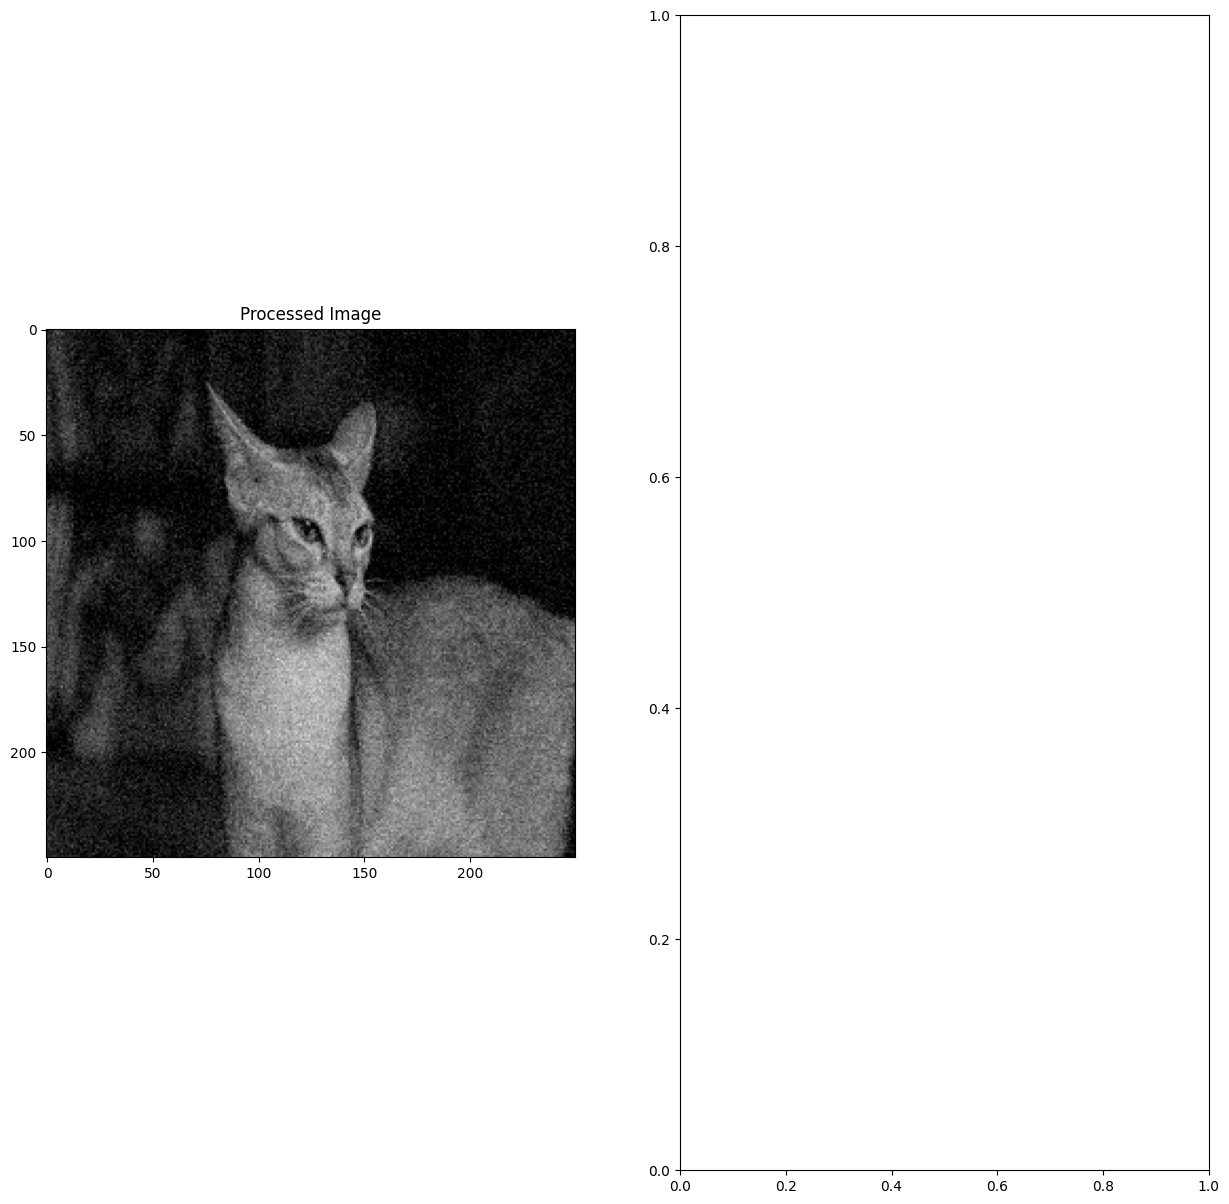

In [46]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= preprocess_with_wiener_like_noise(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')

In [47]:
import os
import numpy as np
from PIL import Image
from skimage.restoration import denoise_bilateral

def remove_wiener_like_noise(image, filter_size=5, sigma_color=0.1, sigma_spatial=15):
    """
    Removes Wiener-like noise from the image.

    Parameters:
    image (numpy.ndarray): The input image.
    filter_size (int): Diameter of each pixel neighborhood that is used during filtering. Default is 5.
    sigma_color (float): Filter sigma in the color space. Default is 0.1.
    sigma_spatial (float): Filter sigma in the coordinate space. Default is 15.

    Returns:
    numpy.ndarray: Denoised image.
    """
    # Convert the image to grayscale
    if len(image.shape) == 3:
        image_gray = np.mean(image, axis=2)
    else:
        image_gray = image

    # Perform bilateral denoising
    denoised_image = denoise_bilateral(image_gray, win_size=filter_size,
                                        sigma_color=sigma_color, sigma_spatial=sigma_spatial)

    # If the input was a color image, stack the denoised image into RGB channels
    if len(image.shape) == 3:
        denoised_image = np.stack([denoised_image] * 3, axis=-1)

    return denoised_image.astype(np.uint8)

def preprocess_remove_wiener_like_noise(img_files, target_shape_img, path1, filter_size=5, sigma_color=0.1, sigma_spatial=15):
    """
    Processes the images present in the given list and path.
    Returns a NumPy dataset with images as 3-D arrays of desired size and removes Wiener-like noise.

    Parameters:
    img_files (list): List of image file names.
    target_shape_img (tuple): Desired shape of the images (height, width, channels).
    path1 (str): Directory path where the images are stored.
    filter_size (int): Diameter of each pixel neighborhood that is used during filtering. Default is 5.
    sigma_color (float): Filter sigma in the color space. Default is 0.1.
    sigma_spatial (float): Filter sigma in the coordinate space. Default is 15.

    Returns:
    numpy.ndarray: Array of processed images with Wiener-like noise removed.
    """
    # Pull the relevant dimensions for the image
    m = len(img_files)                    # number of images
    i_h, i_w, i_c = target_shape_img      # pull height, width, and channels of the image

    # Define X as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.uint8)

    # Process images
    for index, file in enumerate(img_files):
        # Construct the full path to the image file
        path = os.path.join(path1, file)

        # Check if the file exists
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

        # Convert image into an array of desired shape (3 channels)
        with Image.open(path) as single_img:
            single_img = single_img.convert('RGB')
            single_img = single_img.resize((i_w, i_h))  # Resize to target dimensions
            single_img = np.array(single_img, dtype=np.uint8)
            single_img = remove_wiener_like_noise(single_img, filter_size, sigma_color, sigma_spatial)  # Remove Wiener-like noise
            X[index] = single_img

    return X


X Shape: (8, 250, 250, 3)


Text(0.5, 1.0, 'Processed Image')

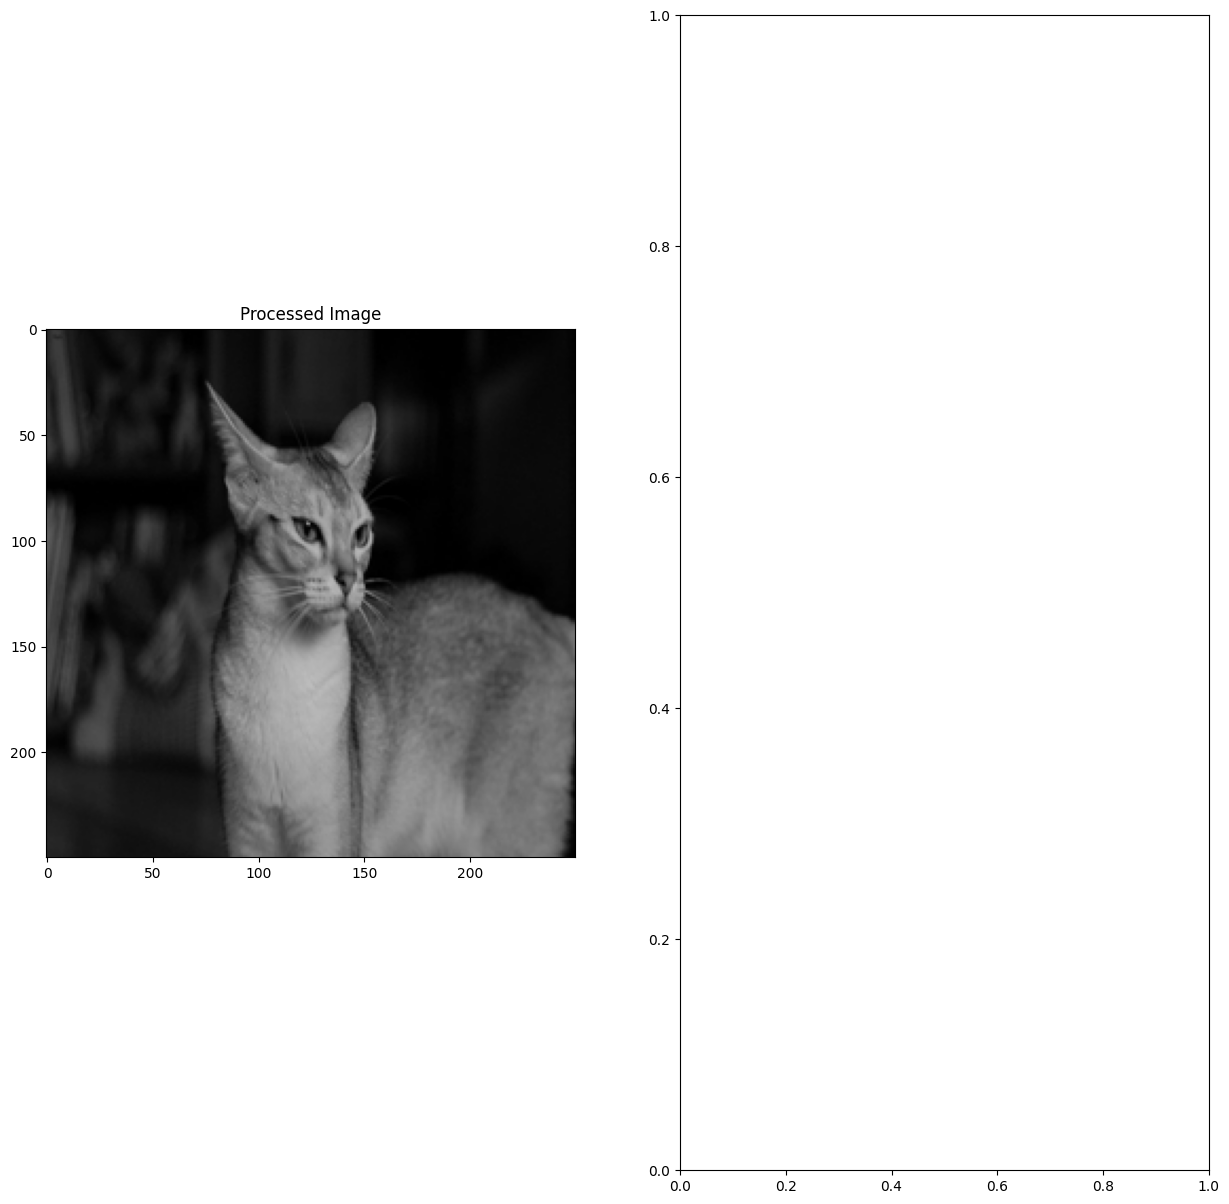

In [48]:
# Define the desired shape
target_shape_img = [250, 250, 3]


# Process data using apt helper function
X= preprocess_remove_wiener_like_noise(img,  target_shape_img, path1)

# QC the shape of output and classes in output dataset
print("X Shape:", X.shape)


# Visualize the output
image_index = 0
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(X[image_index])
arr[0].set_title('Processed Image')